In [1]:
from src.helpers import *
from src.visualization import *
from src.Decks_Class import *
import pandas as pd
import numpy as np
import os

In [5]:
decks = Deck_Array(100_000)
decks.run_decks_array()

100%|████████████████████████████████| 100000/100000 [00:03<00:00, 26249.74it/s]


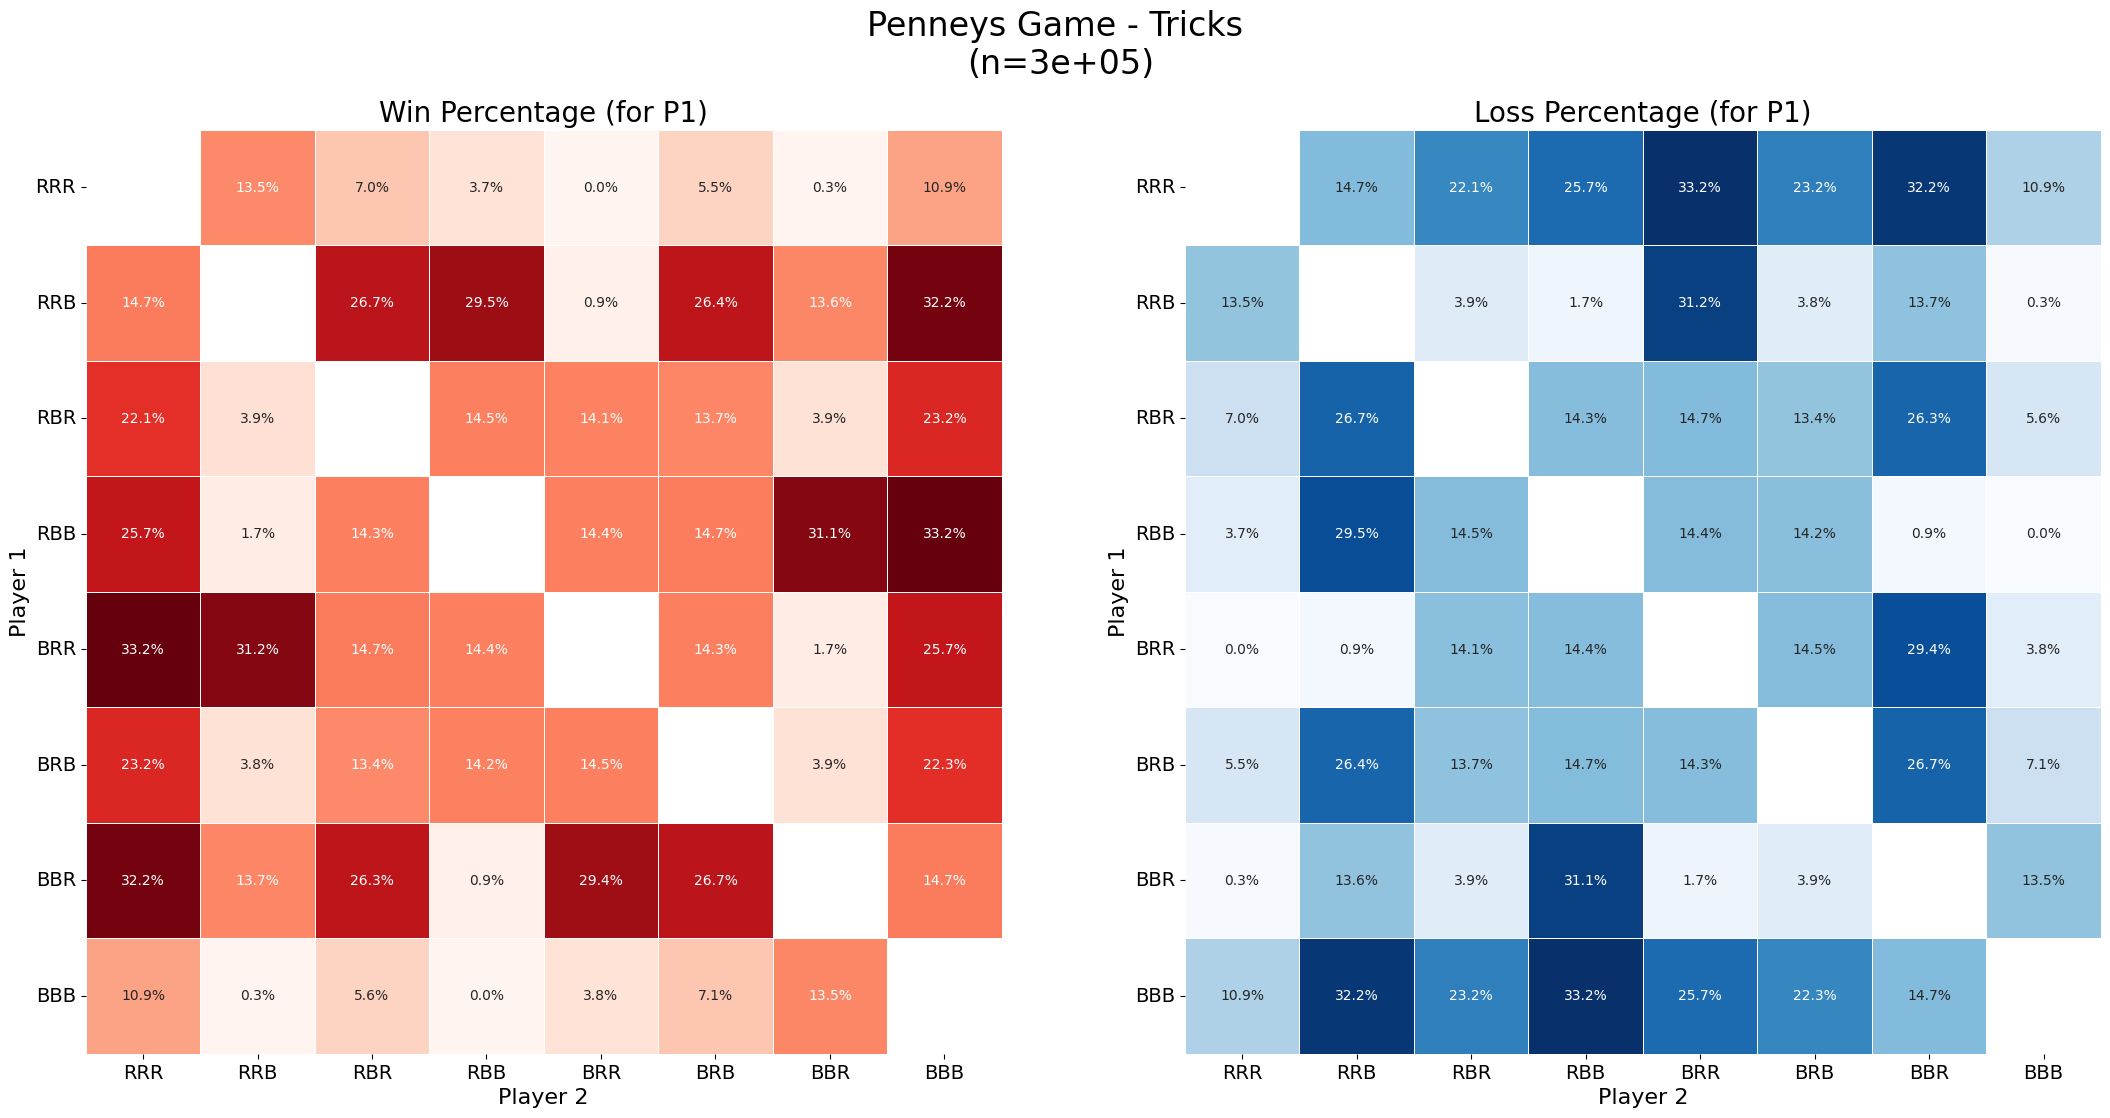

In [16]:
x = gen_heatmap()

In [19]:
plt.show(x)

In [15]:
from src.helpers import SCORES_PATH
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def gen_heatmap(hand_size:int = 3, trick:bool=True, wins:bool=True) -> plt.Figure:
    '''
    Generates heatmaps for cards and tricks. Takes hand size as arguement. 
    
    Returns: None
    '''

   

    # Loads number of total generated and scored decks of certain hand size. 
    total = np.load('src/Deck_Counts/Deck_Counts_hand_size' + str(hand_size) + '.npy')

    if trick:
        # Loads Win and Loss matrices for Tricks of certain hand size
        Trick_Wins = np.load(SCORES_PATH + 'T_Wins_hand_size' + str(hand_size) + '.npy')
        Trick_Losses = np.load(SCORES_PATH + 'T_Losses_hand_size' + str(hand_size) + '.npy')
        # Calculates win and loss percentage matrices for tricks
        trick_win_percent = (Trick_Wins)/total
        trick_loss_percent = (Trick_Losses)/total

        # Create tricks figures
        return create_graphs(trick_win_percent, trick_loss_percent, total, 'Tricks', hand_size)
    else:
        # Loads Win and Loss matrices for Cards of certain hand size
        Cards_Wins = np.load(SCORES_PATH + 'C_Wins_hand_size' + str(hand_size) + '.npy')
        Cards_Losses = np.load(SCORES_PATH + 'C_Losses_hand_size' + str(hand_size) + '.npy')
        # Calculates win and loss percentage matrices for cards
        cards_win_percent = (Cards_Wins)/total
        cards_loss_percent = (Cards_Losses)/total

        # Create cards figures
        return create_graphs(cards_win_percent, cards_loss_percent, total, 'Cards', hand_size)

def create_graphs(win:pd.DataFrame, loss:pd.DataFrame, total:int, name:str, hand_size:int = 3)->plt.Figure:
    '''
    Function takes in Dataframes of Win Percentage and Loss Percentage.
    Creates and saves a figure with name.

    Returns: None
    '''

    # Masks diagonal
    mask = np.asarray(win==0)
    
    # Creates x and y axis labels
    color_labels = []
    # Creates hand size bit binary string for each number 0 - 2^hand size and replaces 0 with R and 1 with B
    for i in range(0, 2**hand_size):
        player = f"{i:0{hand_size}b}".replace('0', 'R').replace('1', 'B')
        color_labels.append(player)

    # Sets n = total and formats in scientific notation
    n = "{:.0e}".format(int(total))

    # Creates figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 12))

    # Sets title for entire figure
    fig.suptitle(f'Penneys Game - {name} \n(n={n})', fontsize=24)
    
    # Rotate y-axis ticks to be more legible
    plt.yticks(rotation=0)
    
    # Creates boolean true if hand size<=4, false otherwise. 
    # Do not want to display text if there are too many labels and boxes too small to fit
    display_text = (hand_size <= 4)
        
    # creates win heatmap
    ax1 = sns.heatmap(win, 
                        annot=display_text, 
                        mask = mask, 
                        cmap='Reds', 
                        fmt='.1%', 
                        linewidths=.5,
                        cbar = False, 
                        ax=ax1)
    
    # Set title and axis labels
    ax1.set_title('Win Percentage (for P1)', fontsize=20)
    ax1.set_xlabel('Player 2', fontsize=16)
    ax1.set_ylabel('Player 1', fontsize=16)

    # set x and y tick labels (only if hand_size <= 4)
    # If user really wants to figure out which hand plays which on larger figure instead of just observing pattern,
    # they can figure it out bc numbers are still listed, can be mentally converted to binary then to red and black
    if display_text:
        ax1.set_yticklabels(labels = color_labels, rotation=0, fontsize=14)
        ax1.set_xticklabels(labels = color_labels, rotation=0, fontsize=14)
    
    # Create loss heatmap
    ax2 = sns.heatmap(loss, 
                        annot=display_text, 
                        mask = mask, 
                        cmap='Blues', 
                        fmt='.1%', 
                        linewidths=.5, 
                        cbar = False, ax=ax2)
    
    # Set title and axis labels
    ax2.set_title('Loss Percentage (for P1)', fontsize=20)
    ax2.set_xlabel('Player 2', fontsize=16)
    ax2.set_ylabel('Player 1', fontsize=16)

    # set x and y tick labels (only if hand_size <= 4)
    if display_text:
        ax2.set_yticklabels(labels = color_labels, rotation=0, fontsize=14)
        ax2.set_xticklabels(labels = color_labels, rotation=0, fontsize=14)
    
    # Save figure with correct trick/card label and hand size
    plt.savefig(f'figures/{name}_hand_size_{hand_size}_heatmap.png')
    return fig

In [27]:
x = !True

In [28]:
x

[]

In [24]:
z

-1

In [ ]:
decks.seed

In [ ]:
np.load('src/Scores/C_Wins_hand_size2.npy')

In [ ]:
np.round(100*np.load('src/Scores/C_Wins_hand_size2.npy')/np.load('src/Deck_Counts/Deck_Counts_hand_size2.npy'),2)

In [ ]:
np.round(100*np.load('src/Scores/C_Losses_hand_size3.npy')/np.load('src/Deck_Counts/Deck_Counts_hand_size3.npy'))

In [ ]:
np.round(100*np.load('src/Scores/T_Wins_hand_size3.npy')/np.load('src/Deck_Counts/Deck_Counts_hand_size3.npy'))

In [ ]:
clear_all()

In [ ]:
Trick_Wins, Trick_Losses, Cards_Wins, Cards_Losses = get_complete_tables()

total = np.sum(np.load('src/Decks/deck_lengths.npy'))

mask = np.asarray(Trick_Wins==0)
color_labels = ['RRR', 'RRB', 'RBR', 'RBB', 'BRR', 'BRB', 'BBR', 'BBB']

trick_win_percent = (Trick_Wins)/total
trick_loss_percent = (Trick_Losses)/total

cards_win_percent = (Cards_Wins)/total
cards_loss_percent = (Cards_Losses)/total

In [ ]:
def create_graphs(win, loss, name):
    n = "{:.0e}".format(int(total))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 12))
    fig.suptitle(f'Penneys Game - {name} \n(n={n})', fontsize=24)
    
    plt.yticks(rotation=0)
    ax1 = sns.heatmap(win, 
                annot=True, mask = mask, cmap='Reds', fmt='.2%', linewidths=.5, ax=ax1)
    
    ax1.set_title('Win Percentage', fontsize=20)
    ax1.set_xlabel('Player 2', fontsize=16)
    ax1.set_ylabel('Player 1', fontsize=16)
    ax1.set_yticklabels(labels = color_labels, rotation=0, fontsize=14)
    ax1.set_xticklabels(labels = color_labels, rotation=0, fontsize=14)
    ax1.figure.axes[-1].set_ylabel('Player 1 Win Percentage', size=16)
    
    
    ax2 = sns.heatmap(loss, 
                annot=True, mask = mask, cmap='Blues', fmt='.2%', linewidths=.5, ax=ax2)
    
    ax2.set_title('Loss Percentage', fontsize=20)
    ax2.set_xlabel('Player 2', fontsize=16)
    ax2.set_ylabel('Player 1', fontsize=16)
    ax2.set_yticklabels(labels = color_labels, rotation=0, fontsize=14)
    ax2.set_xticklabels(labels = color_labels, rotation=0, fontsize=14)
    ax1.figure.axes[-1].set_ylabel('Player 1 Loss Percentage', size=16)
    
    plt.savefig(f'figures/{name}_heatmap.png')
    plt.show()

In [ ]:



n = "{:.0e}".format(int(total))
plt.figure(figsize=(10, 9))
mask = trick_win_percent.isnull()
sns.heatmap(trick_win_percent, annot=True, mask = mask, cmap='Reds', fmt='.2%', linewidths=.5, cbar_kws=False)
plt.title(f'Penneys Game Win Percentage Heatmap\n(n={n})')
plt.yticks(rotation=0)
plt.xlabel('Player 2')
plt.ylabel('Player 1')


plt.figure(figsize=(10, 9))
sns.heatmap(trick_loss_percent, annot=True, mask = mask, cmap='Blues', fmt='.2%',cbar_kws=False)
plt.title(f'Penneys Game Loss Percentage Heatmap\n(n={total})')
plt.yticks(rotation=0)
plt.xlabel('Player 2')
plt.ylabel('Player 1')


# plt.figure(figsize=(10, 9))
# sns.heatmap(cards_win_percent, annot=True, mask = mask, cmap='Reds', fmt='.2%', cbar_kws={'label': 'PLayer 1 Win Percentage'})
# plt.title(f'Penneys Game Win Percentage Heatmap\n(n={n})')
# plt.yticks(rotation=0)
# plt.xlabel('Player 2')
# plt.ylabel('Player 1')
# plt.savefig('figures/cards_win_heatmap.png')

# plt.figure(figsize=(10, 9))
# sns.heatmap(cards_loss_percent, annot=True, mask = mask, cmap='Blues', fmt='.2%',cbar_kws={'label': 'PLayer 1 Loss Percentage'})
# plt.title(f'Penneys Game Loss Percentage Heatmap\n(n={n})')
# plt.yticks(rotation=0)
# plt.xlabel('Player 2')
# plt.ylabel('Player 1')


# plt.figure(figsize=(10, 9))
# sns.heatmap(trick_win_percent-cards_win_percent, annot=True, mask = mask, cmap='vlag', fmt='.2%',cbar_kws={'label': 'PLayer 1 Win Percentage Difference'})
# plt.title(f'Penneys Game Cards vs Tricks Win Percentage Heatmap\n(n={n})')
# plt.yticks(rotation=0)
# plt.xlabel('Player 2')
# plt.ylabel('Player 1')


# plt.figure(figsize=(10, 9))
# sns.heatmap(trick_loss_percent-cards_loss_percent, annot=True, mask = mask, cmap='vlag', fmt='.2%',cbar_kws={'label': 'PLayer 1 Loss Percentage Difference'})
# plt.title(f'Penneys Game Cards vs Tricks Loss Percentage Heatmap\n(n={n})')
# plt.yticks(rotation=0)
# plt.xlabel('Player 2')
# plt.ylabel('Player 1')


In [ ]:
pick_what = pd.DataFrame(data = [[None]*5]*8, columns=['Opponent_Pick','Tricks_WinMax', 'Tricks_LossMin', 'Cards_WinMax','Cards_MinLoss'])
for i, pick in enumerate(Tricks_winp.columns):
    pick_what.loc[i, 'Opponent_Pick'] = pick
    pick_what.loc[i, 'Tricks_WinMax'] = [Tricks_winp.iloc[:,(Tricks_winp.iloc[:,i].argmax())].name, round(Tricks_winp.iloc[:,i].max(),2)]
    pick_what.loc[i, 'Tricks_LossMin'] = [Tricks_lossp.iloc[:,Tricks_lossp.iloc[:,i].argmin()].name, round(Tricks_lossp.iloc[:,i].min(),2)]
    pick_what.loc[i, 'Cards_WinMax'] = [Tricks_winp.iloc[:,(Tricks_winp.iloc[:,i].argmax())].name, round(Tricks_winp.iloc[:,i].max(),2)]
    pick_what.loc[i, 'Cards_MinLoss'] = [Tricks_lossp.iloc[:,Cards_lossp.iloc[:,i].argmin()].name, round(Cards_lossp.iloc[:,i].min(),2)]

In [ ]:
pick_what

In [ ]:
{Tricks_winp.iloc[:,(Tricks_winp.iloc[0].argmax())].name, Tricks_winp.iloc[1].max()}

In [ ]:
Tricks_winp.iloc[:1]

In [ ]:
Tricks_winp

In [ ]:
pick_what['Opponent_Pick'][[1]]

In [ ]:
Tricks_winp.columns[1]

In [ ]:
import os
import numpy as np

In [ ]:
# deck_lengths = np.array([0])
path = 'src/Decks/loaded/'

# for file in os.listdir(path): 
#     deck_lengths = np.append(deck_lengths, (len(np.load(path+file))))
#     print(path+file)
#     print(deck_lengths)

In [ ]:
len(deck_lengths)

In [ ]:
np.save('src/deck_lengths.npy', deck_lengths)

In [ ]:
np.load('src/deck_lengths.npy')

In [ ]:
deck_lengths

In [ ]:
(np.load('src/Decks/seeds+num_cards/deck_lengths.npy'))

In [ ]:
(np.load('src/Decks/seeds+num_cards/used_seeds.npy'))

In [ ]:
deck_lengths = np.array([0])
for i in np.load('src/used_seeds.npy')[1:]:
    deck_lengths = np.append(deck_lengths, (len(np.load(path+f'seed_{i}.npy'))))

In [ ]:
len(np.load(path+f'seed_{14}.npy'))